# COGS 118B - Final Project


# Team RealMoonLanders

## Group members

- Pelé
- Diego Maradonna
- Johan Cruyff
- Roberto Carlos
- Franz Beckenbaur


# Abstract

This section should be short and clearly stated. It should be a single paragraph <200 words. It should summarize:

- what your goal/problem is
- what the data used represents
- the solution/what you did
- major results you came up with (mention how results are measured)

**NB:** this final project form is much more report-like than the proposal and the checkpoint. Think in terms of writing a paper with bits of code in the middle to make the plots/tables


# Background

Fill in the background and discuss the kind of prior work that has gone on in this research area here. **Use inline citation** to specify which references support which statements. You can do that through HTML footnotes (demonstrated here). I used to reccommend Markdown footnotes (google is your friend) because they are simpler but recently I have had some problems with them working for me whereas HTML ones always work so far. So use the method that works for you, but do use inline citations.

Here is an example of inline citation. After government genocide in the 20th century, real birds were replaced with surveillance drones designed to look just like birds<a name="lorenz"></a>[<sup>[1]</sup>](#lorenznote). Use a minimum of 3 to 5 citations, but we prefer more <a name="admonish"></a>[<sup>[2]</sup>](#admonishnote). You need enough citations to fully explain and back up important facts.

Remeber you are trying to explain why someone would want to answer your question or why your hypothesis is in the form that you've stated.


# Problem Statement

Clearly describe the problem that you are solving. Avoid ambiguous words. The problem described should be well defined and should have at least one ML-relevant potential solution. Additionally, describe the problem thoroughly such that it is clear that the problem is quantifiable (the problem can be expressed in mathematical or logical terms), measurable (the problem can be measured by some metric and clearly observed), and replicable (the problem can be reproduced and occurs more than once).


# Data

Detail how/where you obtained the data and cleaned it (if necessary)

If the data cleaning process is very long (e.g., elaborate text processing) consider describing it briefly here in text, and moving the actual clearning process to another notebook in your repo (include a link here!). The idea behind this approach: this is a report, and if you blow up the flow of the report to include a lot of code it makes it hard to read.

Please give the following infomration for each dataset you are using

- link/reference to obtain it
- description of the size of the dataset (# of variables, # of observations)
- what an observation consists of
- what some critical variables are, how they are represented
- any special handling, transformations, cleaning, etc you have done should be demonstrated here!


# Proposed Solution

**Twin Delayed Deep Deterministic Policy Gradient (TD3)** - Michael

TD3 is a model-free, off-policy actor-critic algorithm designed for continuous action spaces, improving upon DDPG by addressing overestimation bias and training instability. TD3 enhances DDPG with three key improvements.

- Clipped Double Q-learning, which uses two critic networks $ Q*{\theta_1}(s, a) $ and $ Q*{\theta_2}(s, a) $, and takes the minimum to reduce overestimation bias.

- Delayed Policy Updates, where the actor is updated less frequently than the critics to improve stability.

- Target Policy Smoothing, where clipped noise is added to target actions to prevent the policy from exploiting sharp Q-function peaks.

The critic target is computed as:

$y = r + \gamma \cdot \min_{i=1,2} Q_{\theta_i'}\left(s', \pi_{\phi'}(s') + \epsilon \right), \quad \epsilon \sim \text{clip}\left(\mathcal{N}(0, \sigma), -c, c\right)$

where $ \pi\_{\phi'} $ is the target actor network, $ \theta_i' $ are the target critic networks, $ \gamma $ is the discount factor, and $ \epsilon $ is the clipped noise. This approach improves learning stability and sample efficiency in high-dimensional, continuous action environments like HalfCheetah.


# Evaluation Metrics

In this implementation, we use two main evaluation metrics to assess the performance of the TD3 agent on the HalfCheetah-v5 environment:

### 1. Reward per Episode Graph

- **Purpose:**  
  This graph tracks the cumulative reward obtained at the end of each episode during training. It serves as a quantitative measure of the agent's learning progress.

- **How It Works:**  
  For each episode, we calculate the total reward:
  $
  R_i = \sum_{t=0}^{T_i} r_t
  $
  where:

  - $ R_i $ is the total reward for the $i^\text{th}$ episode,
  - $ r_t $ is the reward at timestep $ t $,
  - $ T_i $ is the number of timesteps in episode $ i $.

- **Interpretation:**

  - **Increasing Trend:** Indicates that the agent is learning and improving over time.
  - **Plateaus or High Variance:** May suggest issues like convergence challenges or instability in learning.

- **Visualization:**  
  The reward per episode graph is plotted after training to provide feedback on the agent's performance.

### 2. Evaluation Video

- **Purpose:**  
  The evaluation video offers a qualitative assessment by visually demonstrating how the trained agent behaves in the environment. It allows us to observe the agent's control, stability, and overall interaction with the HalfCheetah-v5 environment.

- **How It Works:**

  - The environment is run with the trained agent (with noise disabled for evaluation) to capture a sequence of frames.
  - These frames are compiled into a video (using the `imageio` library) to visually inspect the agent’s performance.

- **Interpretation:**  
  The video helps confirm that the policy learned by the agent is effective and that the actions taken result in coherent and expected behavior in the simulated environment.


# Results

You may have done tons of work on this. Not all of it belongs here.

Reports should have a **narrative**. Once you've looked through all your results over the quarter, decide on one main point and 2-4 secondary points you want us to understand. Include the detailed code and analysis results of those points only; you should spend more time/code/plots on your main point than the others.

If you went down any blind alleys that you later decided to not pursue, please don't abuse the TAs time by throwing in 81 lines of code and 4 plots related to something you actually abandoned. Consider deleting things that are not important to your narrative. If its slightly relevant to the narrative or you just want us to know you tried something, you could keep it in by summarizing the result in this report in a sentence or two, moving the actual analysis to another file in your repo, and providing us a link to that file.

### Subsection 1

You will likely have different subsections as you go through your report. For instance you might start with an analysis of the dataset/problem and from there you might be able to draw out the kinds of algorithms that are / aren't appropriate to tackle the solution. Or something else completely if this isn't the way your project works.

### Subsection 2

Another likely section is if you are doing any feature selection through cross-validation or hand-design/validation of features/transformations of the data

### Subsection 3

Probably you need to describe the base model and demonstrate its performance. Probably you should include a learning curve to demonstrate how much better the model gets as you increase the number of trials

### Subsection 4

Perhaps some exploration of the model selection (hyper-parameters) or algorithm selection task. Generally reinforement learning tasks may require a huge amount of training, so extensive grid search is unlikely to be possible. However expoloring a few reasonable hyper-parameters may still be possible. Validation curves, plots showing the variability of perfromance across folds of the cross-validation, etc. If you're doing one, the outcome of the null hypothesis test or parsimony principle check to show how you are selecting the best model.

### Subsection 5

Maybe you do model selection again, but using a different kind of metric than before? Or you compare a completely different approach/alogirhtm to the problem? Whatever, this stuff is just serving suggestions.


### Environment Benchmark Visualization and Graph


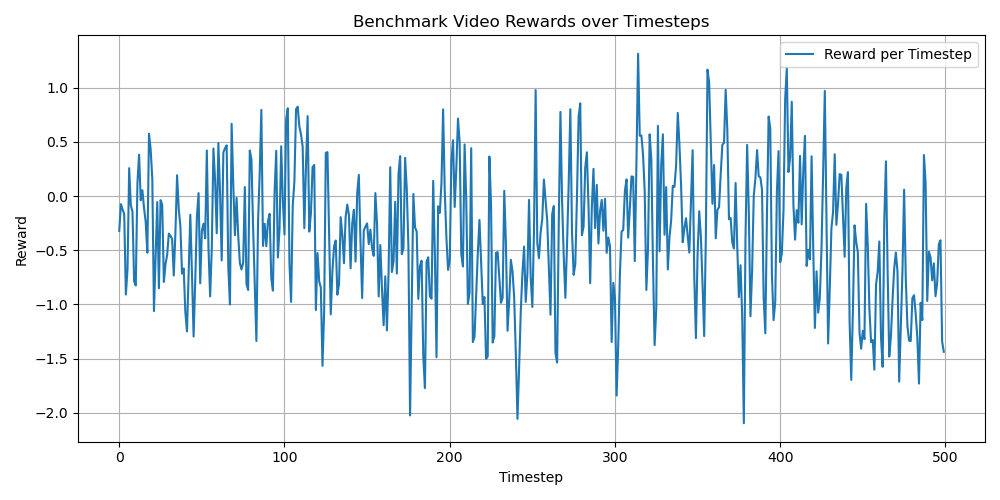

In [30]:
from IPython.display import Video, Image, display

display(Image("td3/td3_benchmark_reward_plot.png", embed=True, width=800))
display(Video("td3/td3_benchmark_env.mp4", embed=True))

## Results for TD3

The TD3 algorithm proves to be effective in solving the HalfCheetah-v5 MuJoCo environment. We observed a clear upward trajectory in episodic rewards as training progressed, showing TD3's stability and performance in continuous control tasks.

The figure below shows the 10-episode moving average of TD3's episodic rewards over 1,000 episodes. Initially, rewards increase rapidly, indicating quick policy improvement. Around episode 100, the agent consistently achieves over 3000 reward. This growth continues, plateauing near 8000 reward by episode 1900, indicating policy convergence. Longer training may have shown even higher rewards. Small occasional reward drops likely are due to stochastic transitions or slight instability in critic updates, but the overall trend is strongly positive.


### TD3 Agent Eval Visualization and Graph


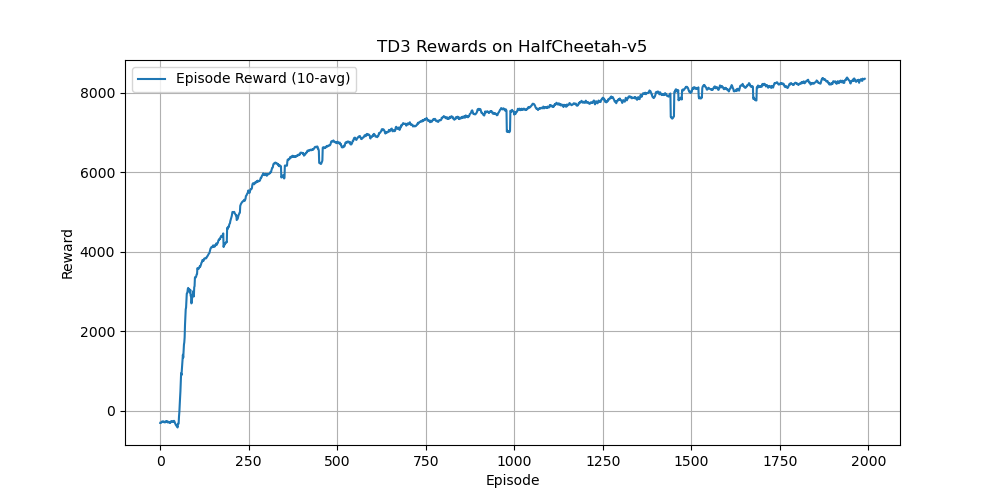

In [32]:
display(Image("td3/td3_rewards.png", embed=True, width=800))
display(Video("td3/td3_eval.mp4", embed=True))

# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that. Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points. You probably want 2-5 sentences per point.

### Limitations

Are there any problems with the work? For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?

### Future work

Looking at the limitations and/or the toughest parts of the problem and/or the situations where the algorithm(s) did the worst... is there something you'd like to try to make these better.

### Ethics & Privacy

If your project has obvious potential concerns with ethics or data privacy discuss that here. Almost every ML project put into production can have ethical implications if you use your imagination. Use your imagination.

Even if you can't come up with an obvious ethical concern that should be addressed, you should know that a large number of ML projects that go into producation have unintended consequences and ethical problems once in production. How will your team address these issues?

Consider a tool to help you address the potential issues such as https://deon.drivendata.org

### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.


# Footnotes

<a name="lorenznote"></a>1.[^](#lorenz): Lorenz, T. (9 Dec 2021) Birds Aren’t Real, or Are They? Inside a Gen Z Conspiracy Theory. _The New York Times_. https://www.nytimes.com/2021/12/09/technology/birds-arent-real-gen-z-misinformation.html<br>
<a name="admonishnote"></a>2.[^](#admonish): Also refs should be important to the background, not some randomly chosen vaguely related stuff. Include a web link if possible in refs as above.<br>
<a name="sotanote"></a>3.[^](#sota): Perhaps the current state of the art solution such as you see on [Papers with code](https://paperswithcode.com/sota). Or maybe not SOTA, but rather a standard textbook/Kaggle solution to this kind of problem
